José Luis Roberto Zárate Cortés (000183347)
### **Semana 3; Clase 3_algebra_lineal, 3_minimos_cuadrados**
### _No Lineales y Error Cuadrático Medio._
3. Regresión Lineal, Modelo sin Intercepto.  
Como ejemplo utilizaremos el conjunto de datos "datos_para_ipynb_3_minimos_cuadrados.txt". Ajustaremos tres modelos de la forma:  
$$f_1(x|\beta)=\beta_0+\beta_1 \frac{x}{x+1}$$
$$f_2(x|\beta)=\beta_0+\beta_1 x+\beta_2x^2$$
$$f_3(x|\beta)=\beta_0+\beta_1 \log(x+1)$$
tomando como variable respuesta la segunda columna de los datos etiquetada como $y$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
from numpy import log
np.set_printoptions(precision = 3)

_DATOS_

In [2]:
datos = np.loadtxt('datos_para_ipynb_3_minimos_cuadrados.txt', skiprows=1)
x = datos[:,0]
y = datos[:,1]
mpoints, = x.shape

**MODELO I**

In [3]:
phi_1 = lambda var: var/(var+1)
A=np.ones((mpoints,2))
A[:,1] = phi_1(x)
Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@y)
y_ajustadas_QR = A@beta
print('Coeficientes de beta:',beta)

Coeficientes de beta: [-1.303  6.196]


**MODELO II**

In [4]:
ngrado = 2
coeficientes = np.polyfit(x,y,ngrado)
print('Coefientes del modelo de ajuste grado 2:')
pprint.pprint(coeficientes)
#y_ajustadas_numpy = coeficientes[2] + coeficientes[1] * x + coeficientes[0] * x**2
y_ajustadas_numpy = np.polyval(coeficientes,x)

Coefientes del modelo de ajuste grado 2:
array([-0.694,  3.395, -0.919])


**MODELO III**

In [11]:
phi_2 = lambda regr: log(regr+1)
MatA=np.ones((mpoints,2))
MatA[:,1] = phi_2(x)
MatQ,MatR = np.linalg.qr(MatA)
mlogbeta = np.linalg.solve(MatR,MatQ.T@y)
y_adjusted_QR = MatA@mlogbeta
print('Coeficientes de beta:',mlogbeta)

Coeficientes de beta: [-0.98   3.957]


**GRÁFICAS DE LOS MODELOS**

Text(0.5, 1.0, 'datos')

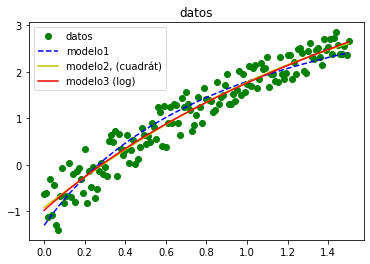

In [13]:
plt.plot(x, y, 'go', x, y_ajustadas_QR , 'b--', x, y_ajustadas_numpy, 'y-', x, y_adjusted_QR, 'r-')
plt.legend(['datos', 'modelo1', 'modelo2, (cuadrát)', 'modelo3 (log)'], loc='best')
plt.title('datos')

**ECM**

In [15]:
ECM_M1=1/(y.shape[0]-1)*sum((y-y_ajustadas_QR)**2)
ECM_M2=1/(y.shape[0]-1)*sum((y-y_ajustadas_numpy)**2)
ECM_M3=1/(y.shape[0]-1)*sum((y-y_adjusted_QR)**2)
print('El error cuadrático medio para el modelo1 () ES:',ECM_M1)
print('El error cuadrático medio para el modelo2 cuadrático es:',ECM_M2)
print('El error cuadrático medio para el modelo3 log es:',ECM_M3)

El error cuadrático medio para el modelo1 () ES: 0.0977071429356011
El error cuadrático medio para el modelo2 cuadrático es: 0.0798292425111074
El error cuadrático medio para el modelo3 log es: 0.08027531879291548


**_CONCLUSIONES:_**  
Observamos que el modelo cuadrático es el que presenta un mejor ajuste a los datos al observar que su ECM es menor, seguido del logarítmico.